In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("CarPrice_Cleaned_Data.csv")

In [3]:
df.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
## Independent And dependent features
x=df.drop('price',axis=1)
y=df['price']

In [5]:
x.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [6]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [7]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [8]:
X_train.shape,X_test.shape

((153, 17), (52, 17))

In [9]:
## Feature Selection based on correlaltion
X_train.corr()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000,-0.181061,-0.098583,0.238473,-0.541502,-0.348344,-0.195923,-0.528535,-0.195393,-0.059810,-0.085171,-0.087823,-0.160308,0.102295,0.294933,-0.091635,-0.001329
fueltype,-0.181061,1.000000,0.412330,-0.043095,0.282147,0.202507,0.175186,0.275284,0.156650,0.012909,0.013915,0.195770,0.983458,-0.190765,-0.433773,0.313698,0.219543
aspiration,-0.098583,0.412330,1.000000,-0.065465,0.283435,0.250184,0.267922,0.140654,0.281105,0.049414,0.194063,0.142155,0.313864,0.202334,-0.157431,-0.163395,-0.219497
enginelocation,0.238473,-0.043095,-0.065465,1.000000,-0.217852,-0.063968,-0.063299,-0.120758,0.057647,0.231172,0.218967,-0.166109,-0.019350,0.353936,0.215155,-0.182112,-0.119546
wheelbase,-0.541502,0.282147,0.283435,-0.217852,1.000000,0.867831,0.757467,0.594085,0.737963,0.477444,0.427996,0.185439,0.221832,0.275981,-0.372485,-0.411992,-0.503377
carlength,-0.348344,0.202507,0.250184,-0.063968,0.867831,1.000000,0.816638,0.472789,0.860834,0.628876,0.560216,0.126011,0.150871,0.493823,-0.326235,-0.627248,-0.668831
carwidth,-0.195923,0.175186,0.267922,-0.063299,0.757467,0.816638,1.000000,0.241819,0.837648,0.699069,0.521404,0.156746,0.132170,0.612809,-0.214002,-0.619266,-0.652006
carheight,-0.528535,0.275284,0.140654,-0.120758,0.594085,0.472789,0.241819,1.000000,0.247078,-0.018490,0.131035,-0.006942,0.239474,-0.157625,-0.305189,-0.004841,-0.076102
curbweight,-0.195393,0.156650,0.281105,0.057647,0.737963,0.860834,0.837648,0.247078,1.000000,0.836782,0.621935,0.127347,0.102161,0.732288,-0.273568,-0.757361,-0.802373
enginesize,-0.059810,0.012909,0.049414,0.231172,0.477444,0.628876,0.699069,-0.018490,0.836782,1.000000,0.555814,0.147685,-0.009141,0.802823,-0.245404,-0.654107,-0.672278


<Axes: >

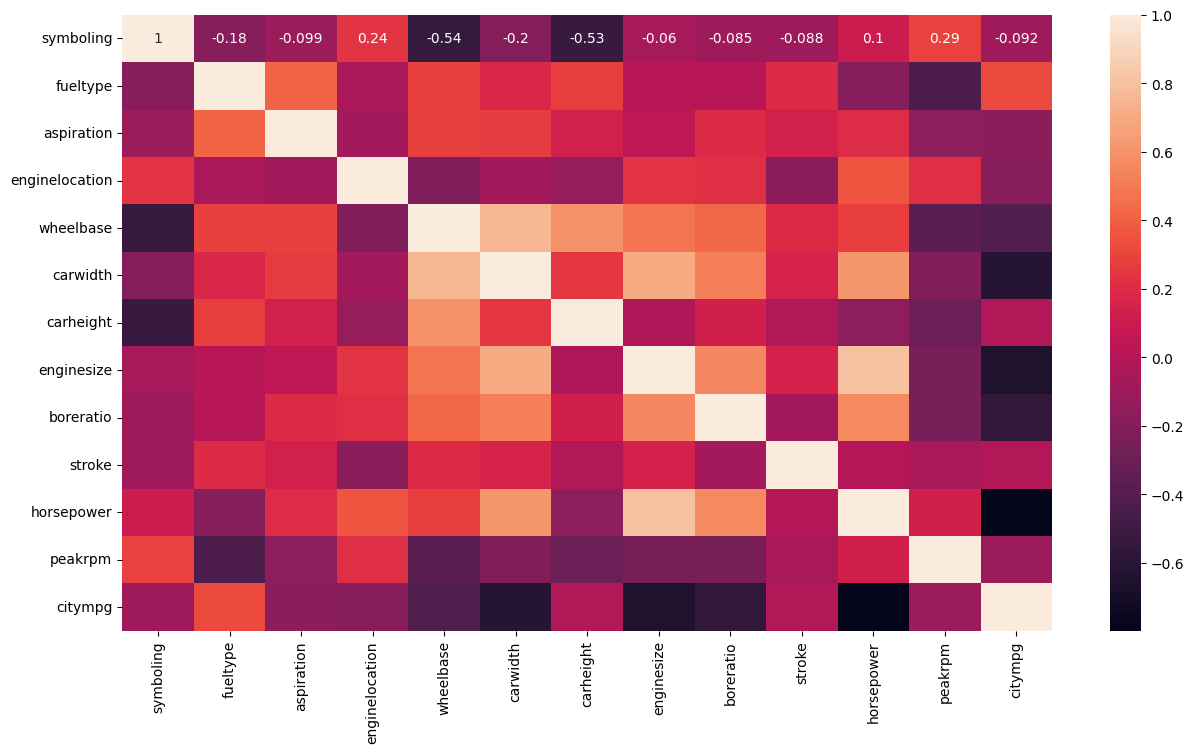

In [23]:
## Check for multicollinearity
plt.figure(figsize=(15,8))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [11]:
X_train.corr()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000,-0.181061,-0.098583,0.238473,-0.541502,-0.348344,-0.195923,-0.528535,-0.195393,-0.059810,-0.085171,-0.087823,-0.160308,0.102295,0.294933,-0.091635,-0.001329
fueltype,-0.181061,1.000000,0.412330,-0.043095,0.282147,0.202507,0.175186,0.275284,0.156650,0.012909,0.013915,0.195770,0.983458,-0.190765,-0.433773,0.313698,0.219543
aspiration,-0.098583,0.412330,1.000000,-0.065465,0.283435,0.250184,0.267922,0.140654,0.281105,0.049414,0.194063,0.142155,0.313864,0.202334,-0.157431,-0.163395,-0.219497
enginelocation,0.238473,-0.043095,-0.065465,1.000000,-0.217852,-0.063968,-0.063299,-0.120758,0.057647,0.231172,0.218967,-0.166109,-0.019350,0.353936,0.215155,-0.182112,-0.119546
wheelbase,-0.541502,0.282147,0.283435,-0.217852,1.000000,0.867831,0.757467,0.594085,0.737963,0.477444,0.427996,0.185439,0.221832,0.275981,-0.372485,-0.411992,-0.503377
carlength,-0.348344,0.202507,0.250184,-0.063968,0.867831,1.000000,0.816638,0.472789,0.860834,0.628876,0.560216,0.126011,0.150871,0.493823,-0.326235,-0.627248,-0.668831
carwidth,-0.195923,0.175186,0.267922,-0.063299,0.757467,0.816638,1.000000,0.241819,0.837648,0.699069,0.521404,0.156746,0.132170,0.612809,-0.214002,-0.619266,-0.652006
carheight,-0.528535,0.275284,0.140654,-0.120758,0.594085,0.472789,0.241819,1.000000,0.247078,-0.018490,0.131035,-0.006942,0.239474,-0.157625,-0.305189,-0.004841,-0.076102
curbweight,-0.195393,0.156650,0.281105,0.057647,0.737963,0.860834,0.837648,0.247078,1.000000,0.836782,0.621935,0.127347,0.102161,0.732288,-0.273568,-0.757361,-0.802373
enginesize,-0.059810,0.012909,0.049414,0.231172,0.477444,0.628876,0.699069,-0.018490,0.836782,1.000000,0.555814,0.147685,-0.009141,0.802823,-0.245404,-0.654107,-0.672278


In [12]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [13]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [14]:
corr_features

{'carlength', 'compressionratio', 'curbweight', 'highwaympg'}

In [15]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((153, 13), (52, 13))

In [16]:
X_train

,symboling,fueltype,aspiration,enginelocation,wheelbase,carwidth,carheight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg
90,1,1,0,0,94.5,63.8,54.5,103,2.99,3.47,55,4800,45
173,-1,0,0,0,102.4,66.5,54.9,122,3.31,3.54,92,4200,29
93,1,0,0,0,94.5,63.8,53.5,97,3.15,3.29,69,5200,31
5,2,0,0,0,99.8,66.3,53.1,136,3.19,3.40,110,5500,19
167,2,0,0,0,98.4,65.6,52.0,146,3.62,3.50,116,4800,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,0,99.2,67.9,49.7,181,3.43,3.27,160,5200,19
14,1,0,0,0,103.5,66.9,55.7,164,3.31,3.19,121,4250,20
92,1,0,0,0,94.5,63.8,54.5,97,3.15,3.29,69,5200,31
179,3,0,0,0,102.9,67.7,52.0,171,3.27,3.35,161,5200,19


## Feature Scaling Or Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 0.08378916,  3.28165062, -0.46291005, ..., -1.25329241,
        -0.73058206,  3.27147184],
       [-1.5186785 , -0.3047247 , -0.46291005, ..., -0.33900268,
        -1.95892332,  0.66621385],
       [ 0.08378916, -0.3047247 , -0.46291005, ..., -0.90734494,
         0.08831212,  0.9918711 ],
       ...,
       [ 0.08378916, -0.3047247 , -0.46291005, ..., -0.90734494,
         0.08831212,  0.9918711 ],
       [ 1.68625681, -0.3047247 , -0.46291005, ...,  1.36602412,
         0.08831212, -0.96207239],
       [-0.71744467, -0.3047247 , -0.46291005, ...,  1.14362932,
         0.08831212, -1.28772964]])

## Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
##plt.scatter(y_test,y_pred)

Mean absolute error 2486.836779849691
R2 Score 0.8039639860574738


## Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 2486.9738633709608
R2 Score 0.8039937725242134


## Ridge Regression model

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 2488.567113104291
R2 Score 0.8042180544474663


## Elasticnet Regression

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 2664.909753444199
R2 Score 0.7688353390760154


In [24]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))